# SCENE - Clustering

In [393]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler

from sklearn.cluster import KMeans

In [394]:
customers = pd.read_csv("customers.csv")

Pipeline
https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html

In [395]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
customers.head()

,Unique_member_identifier,gender,Age,Urban,FSA,City,LanguagePreference,TuesdayAttendee_tendancy,TuesdayAttendee_value,AttendsWithChild_tendancy,AttendsWithChild_value,OnlineTicketPurchaser_tendancy,OnlineTicketPurchaser_value,OpensEmail_tendancy,OpensEmail_value,ClicksEmail_tendancy,ConcessionPurchaser_value,AvgNetPointsPerMovie,AvgSpendPerMovie,PercentSpendOver30,TtlNetPoints,TtlMovieSpend,AvgSpendPerMonth,AvgMoviesPerMonth,AvgDaysBetweenMovies,AvgTimeOfDay,NumDayTimeMovies,NumEveningMovies,NumLateNightMovies,ModeTime,TtlCarrotInterventionPoints,TtlStepPointsCarrot,UserReachableViaSMSEmail,TimeplayPlayer,CarrotRewardsUser
1,E7ADE72A-7B37-4CE4-8C6B-CBD91C563E59,Male,15,0,T0L,Priddis,English,0,0,0,0,0,0,0,LOW,0,100,200.000000,25.980000,0.5,400.0,51.96,10.392,0.4,77.000000,18.666667,NaN,3.0,NaN,Evening,NaN,NaN,0,0,0
3,E186B0AF-3ACC-436E-A5B0-6B999EED8E19,Female,20,1,T6L,Edmonton,English,0,0,0,0,0,0,1,MED,0,40,80.000000,13.490000,0.0,320.0,53.96,10.792,0.8,17.666667,19.500000,NaN,3.0,1.0,Evening,NaN,NaN,0,0,0
5,EEDECC0E-366E-4129-AEAF-3F07979BCED6,Female,31,1,M4y,Toronto,English,0,0,0,0,0,0,1,MED,1,0,83.333333,9.828333,0.0,500.0,58.97,11.794,1.2,23.200000,10.000000,2.0,1.0,3.0,Late Night,0.0,0.0,1,1,0
6,09D76A21-5EEB-46F8-9531-B16DA17B8043,Female,43,1,K7S,Arnprior,English,1,100,0,0,1,100,1,MED,1,0,220.000000,7.990000,0.0,220.0,7.99,1.598,0.2,64.000000,16.000000,1.0,NaN,NaN,Day,485.0,172.0,0,0,1
7,5D78F52D-DA90-4FC2-B723-C786A823720E,Female,38,1,L4L,Vaughan,English,0,25,1,50,0,0,1,HIGH,1,100,233.333333,19.313333,0.0,700.0,57.94,11.588,0.6,34.000000,12.666667,3.0,NaN,NaN,Day,NaN,NaN,1,0,0


In [396]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9217 entries, 1 to 17997
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unique_member_identifier        9217 non-null   object 
 1   gender                          9217 non-null   object 
 2   Age                             9217 non-null   int64  
 3   Urban                           9217 non-null   int64  
 4   FSA                             9217 non-null   object 
 5   City                            9214 non-null   object 
 6   LanguagePreference              9217 non-null   object 
 7   TuesdayAttendee_tendancy        9217 non-null   int64  
 8   TuesdayAttendee_value           9217 non-null   int64  
 9   AttendsWithChild_tendancy       9217 non-null   int64  
 10  AttendsWithChild_value          9217 non-null   int64  
 11  OnlineTicketPurchaser_tendancy  9217 non-null   int64  
 12  OnlineTicketPurchaser_value     9

## Encoding

In [397]:
X = customers.copy()

In [398]:
X.head()

,Unique_member_identifier,gender,Age,Urban,FSA,City,LanguagePreference,TuesdayAttendee_tendancy,TuesdayAttendee_value,AttendsWithChild_tendancy,AttendsWithChild_value,OnlineTicketPurchaser_tendancy,OnlineTicketPurchaser_value,OpensEmail_tendancy,OpensEmail_value,ClicksEmail_tendancy,ConcessionPurchaser_value,AvgNetPointsPerMovie,AvgSpendPerMovie,PercentSpendOver30,TtlNetPoints,TtlMovieSpend,AvgSpendPerMonth,AvgMoviesPerMonth,AvgDaysBetweenMovies,AvgTimeOfDay,NumDayTimeMovies,NumEveningMovies,NumLateNightMovies,ModeTime,TtlCarrotInterventionPoints,TtlStepPointsCarrot,UserReachableViaSMSEmail,TimeplayPlayer,CarrotRewardsUser
1,E7ADE72A-7B37-4CE4-8C6B-CBD91C563E59,Male,15,0,T0L,Priddis,English,0,0,0,0,0,0,0,LOW,0,100,200.000000,25.980000,0.5,400.0,51.96,10.392,0.4,77.000000,18.666667,NaN,3.0,NaN,Evening,NaN,NaN,0,0,0
3,E186B0AF-3ACC-436E-A5B0-6B999EED8E19,Female,20,1,T6L,Edmonton,English,0,0,0,0,0,0,1,MED,0,40,80.000000,13.490000,0.0,320.0,53.96,10.792,0.8,17.666667,19.500000,NaN,3.0,1.0,Evening,NaN,NaN,0,0,0
5,EEDECC0E-366E-4129-AEAF-3F07979BCED6,Female,31,1,M4y,Toronto,English,0,0,0,0,0,0,1,MED,1,0,83.333333,9.828333,0.0,500.0,58.97,11.794,1.2,23.200000,10.000000,2.0,1.0,3.0,Late Night,0.0,0.0,1,1,0
6,09D76A21-5EEB-46F8-9531-B16DA17B8043,Female,43,1,K7S,Arnprior,English,1,100,0,0,1,100,1,MED,1,0,220.000000,7.990000,0.0,220.0,7.99,1.598,0.2,64.000000,16.000000,1.0,NaN,NaN,Day,485.0,172.0,0,0,1
7,5D78F52D-DA90-4FC2-B723-C786A823720E,Female,38,1,L4L,Vaughan,English,0,25,1,50,0,0,1,HIGH,1,100,233.333333,19.313333,0.0,700.0,57.94,11.588,0.6,34.000000,12.666667,3.0,NaN,NaN,Day,NaN,NaN,1,0,0


<AxesSubplot:ylabel='Frequency'>

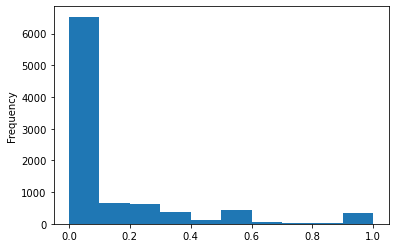

In [399]:
X['PercentSpendOver30'].plot.hist()

In [400]:
X = customers.drop(columns=['Unique_member_identifier','FSA', 'City', 'LanguagePreference'], axis=1)

We engineer features to represent the category and the contributions of various measures towards these categories

In [401]:
X['NonTuesday_value'] = 100-X['TuesdayAttendee_value'] 
X['NonChild_value'] = 100-X['AttendsWithChild_value'] 
X['PercentSpendLess30'] = 100-(100*X['PercentSpendOver30'])
X['NonConcession_value'] = 100-X['ConcessionPurchaser_value']

In [402]:
X['TechScore'] = 0.2*X['UserReachableViaSMSEmail']+0.60*X['OnlineTicketPurchaser_value']+0.1*X['TimeplayPlayer']+0.05*X['CarrotRewardsUser']

In [403]:
#X["Group"] = X[["NonChild_value", "PercentSpendLess30"]].max(axis=1)
#X["Group"] = 0.80*X['NonChild_value'] + 0.20*X['PercentSpendLess30']
X["Group"] = 0.66*X['NonChild_value'] + 0.17*X['PercentSpendLess30'] + 0.17*X['NonConcession_value']
#if child = family, group
#if spend over 30 -> more spending = group
# if concessions, maybe group?

<AxesSubplot:ylabel='Frequency'>

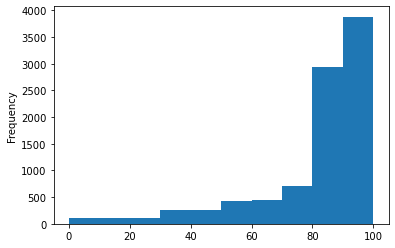

In [404]:
X['Group'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

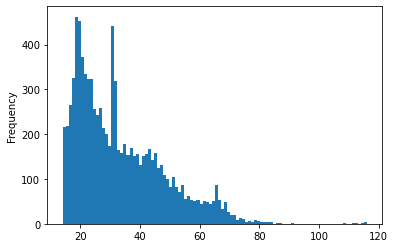

In [405]:
X['Age'].plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

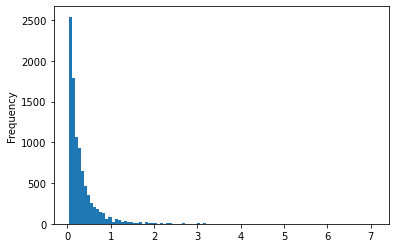

In [406]:
X['AvgMoviesPerMonth'].plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

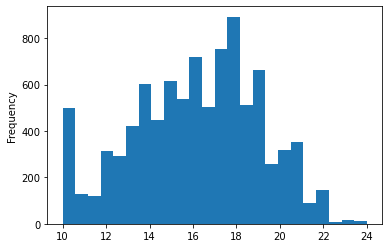

In [407]:
X['AvgTimeOfDay'].plot.hist(bins=24)

In [408]:
#cleanup_nums = {"ModeTime": {"Day": 0.33,"Evening": 0.66, "Late Night": 1}}

#X.replace(cleanup_nums, inplace=True)
#X.head()

In [409]:
# We pair down to the most relevant features
feature_names = ['AvgSpendPerMovie', 'AvgTimeOfDay', 'Group',
#            'AvgMoviesPerMonth','TechScore', 'Age']
#feature_names = ['AvgSpendPerMovie', 'ModeTime', 'Group',
            'AvgMoviesPerMonth','TechScore', 'Age']

In [410]:
X = X[feature_names]

In [411]:
numeric_features = X.select_dtypes('number').columns
categorical_features = X.select_dtypes('object').columns

In [412]:
# Fill n/a with 0
X[numeric_features] = X[numeric_features].fillna(0)

In [413]:
#One Hot Encoding
X = pd.get_dummies(X, columns=categorical_features)

In [414]:
col_names = X.columns

In [415]:
col_names

Index(['AvgSpendPerMovie', 'AvgTimeOfDay', 'Group', 'AvgMoviesPerMonth',
       'TechScore', 'Age'],
      dtype='object')

https://stackoverflow.com/questions/38420847/apply-standardscaler-to-parts-of-a-data-set

ct = ColumnTransformer([
        ('scaler', StandardScaler(), numeric_features)
    ], remainder='passthrough')

X = ct.fit_transform(X)

In [416]:
X_scaled = X.copy()
features = X_scaled[numeric_features]
#scaler = StandardScaler().fit(features.values)
scaler = MinMaxScaler().fit(features.values)
features = scaler.transform(features.values)
X_scaled[numeric_features] = features

## Agglomerative Clustering

In [417]:
import scipy.cluster

aggl = scipy.cluster.hierarchy.linkage(X_scaled, method='ward', metric='euclidean')

In [418]:
labels = scipy.cluster.hierarchy.fcluster(aggl, 8, criterion="maxclust")

For n_clusters = 8 The average silhouette_score is : 0.22871863783569119


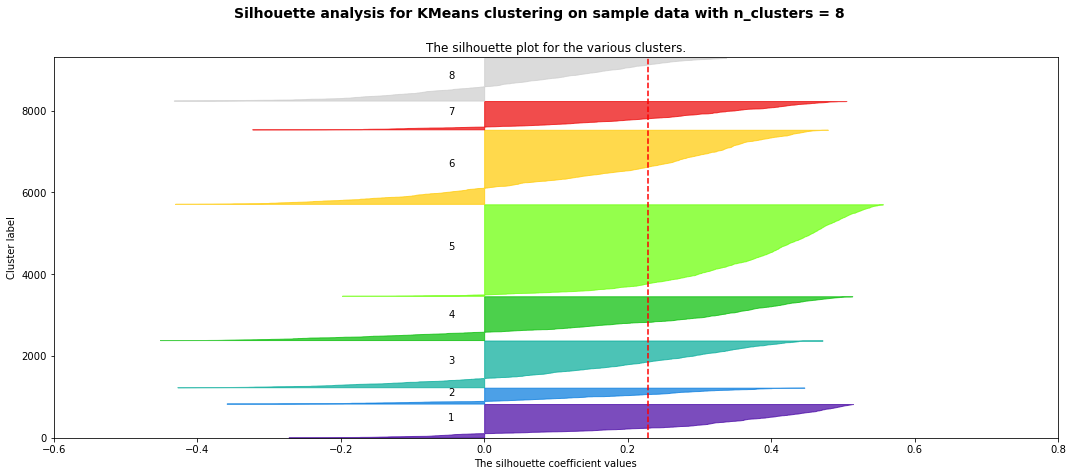

In [419]:
# Reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

import matplotlib.cm as cm

# Create a subplot with 1 row and 2 columns
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.6, 0.8])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X_scaled) + (8+1) * 10])

# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.
clusterer = aggl
cluster_labels = labels

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print("For n_clusters =", 8,
      "The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

y_lower = 10
for i in range(1,9):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 8)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

#ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8])

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % 8),
             fontsize=14, fontweight='bold')

plt.show()

### Agglomerative Clusters

In [420]:
feature_df = pd.DataFrame(X, columns=col_names)

In [421]:
feature_df['cluster'] = pd.Series(cluster_labels, index=customers.index)

In [422]:
feature_df['cluster'] = pd.Series(cluster_labels, index=feature_df.index)

In [423]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9217 entries, 1 to 17997
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AvgSpendPerMovie   9217 non-null   float64
 1   AvgTimeOfDay       9217 non-null   float64
 2   Group              9217 non-null   float64
 3   AvgMoviesPerMonth  9217 non-null   float64
 4   TechScore          9217 non-null   float64
 5   Age                9217 non-null   int64  
 6   cluster            9217 non-null   int32  
dtypes: float64(5), int32(1), int64(1)
memory usage: 540.1 KB


In [424]:
cluster_means = feature_df.groupby(['cluster']).mean().reset_index()

In [425]:
cluster_means

,cluster,AvgSpendPerMovie,AvgTimeOfDay,Group,AvgMoviesPerMonth,TechScore,Age
0,1,11.470612,15.445769,94.216538,0.312417,53.505508,29.658507
1,2,24.654792,14.500874,45.615369,0.247443,34.098462,40.794872
2,3,14.535080,16.055977,89.356559,0.381966,27.835533,32.310315
3,4,26.999942,14.997657,42.244729,0.258997,2.418424,36.997201
4,5,16.466475,18.991270,88.114208,0.274626,1.675413,24.082180
5,6,15.516681,13.832753,91.406716,0.351653,3.208549,24.199669
6,7,17.396859,13.899834,88.304151,0.307076,0.609812,59.284271
7,8,17.242155,17.931939,83.280551,0.289232,3.115491,48.320305


In [426]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html
uns_clust_mean = pd.melt(cluster_means, id_vars=['cluster'], value_vars=feature_names)

In [427]:
uns_clust_mean

,cluster,variable,value
0,1,AvgSpendPerMovie,11.470612
1,2,AvgSpendPerMovie,24.654792
2,3,AvgSpendPerMovie,14.535080
3,4,AvgSpendPerMovie,26.999942
4,5,AvgSpendPerMovie,16.466475
5,6,AvgSpendPerMovie,15.516681
6,7,AvgSpendPerMovie,17.396859
7,8,AvgSpendPerMovie,17.242155
8,1,AvgTimeOfDay,15.445769
9,2,AvgTimeOfDay,14.500874


In [428]:
demographics = ['Age']
entertainment = ['AvgMoviesPerMonth']
group=['Group']
tech = ['TechScore']
time = ['AvgTimeOfDay', 'ModeTime']
spending = ['NonTuesday_value','AvgSpendPerMovie']

In [429]:
uns_clust_mean['Category'] = ""
uns_clust_mean.loc[uns_clust_mean['variable'].isin(spending),'Category'] = "Spending"
uns_clust_mean.loc[uns_clust_mean['variable'].isin(entertainment),'Category'] = "Entertainment"
uns_clust_mean.loc[uns_clust_mean['variable'].isin(demographics),'Category'] = "Demographics"
uns_clust_mean.loc[uns_clust_mean['variable'].isin(group),'Category'] = "Group Habits"
uns_clust_mean.loc[uns_clust_mean['variable'].isin(tech),'Category'] = "Tech Savviness"
uns_clust_mean.loc[uns_clust_mean['variable'].isin(time),'Category'] = "Time of Day"

In [430]:
from scipy import stats

In [431]:
def get_percentile(row):
    percentile = stats.percentileofscore(X[row['variable']], row['value'])
    return percentile

In [432]:
uns_clust_mean['Percentile'] = uns_clust_mean.apply(get_percentile, axis=1)

In [433]:
#dummys = ['TimeplayPlayer','CarrotRewardsUser']
#uns_clust_mean.loc[uns_clust_mean['variable'].isin(dummys),'Percentile'] = uns_clust_mean['value']*100

In [434]:
#uns_clust_mean.loc[uns_clust_mean['variable']=='AvgDaysBetweenMovies','Percentile'] = 100-uns_clust_mean['Percentile']

## Percentiles

In [435]:
cluster_pt = pd.pivot_table(uns_clust_mean, values='Percentile', index=['Category', 'variable'],
                    columns=['cluster'], aggfunc=np.sum)
cluster_pt

,cluster,1,2,3,4,5,6,7,8
Category,variable,,,,,,,,
Demographics,Age,48.432245,72.290333,58.576543,65.682977,35.727460,35.727460,93.349246,84.658783
Entertainment,AvgMoviesPerMonth,68.167517,58.478898,75.198004,61.603559,63.664967,72.355430,67.527395,65.769773
Group Habits,Group,70.662906,8.093740,56.298145,7.182380,51.871542,60.301617,52.077683,40.501248
Spending,AvgSpendPerMovie,24.953890,80.915699,51.318216,86.177715,58.489747,54.573071,62.080937,61.158728
Tech Savviness,TechScore,94.032766,87.154172,81.892156,58.977975,58.804383,59.661495,58.674189,59.411956
Time of Day,AvgTimeOfDay,39.221005,29.478138,47.705327,32.201367,80.796355,22.436802,22.664641,67.831182


## Actual Values

In [436]:
cluster_pt_val = pd.pivot_table(uns_clust_mean, values='value', index=['Category', 'variable'],
                    columns=['cluster'], aggfunc=np.sum)
cluster_pt_val

,cluster,1,2,3,4,5,6,7,8
Category,variable,,,,,,,,
Demographics,Age,29.658507,40.794872,32.310315,36.997201,24.082180,24.199669,59.284271,48.320305
Entertainment,AvgMoviesPerMonth,0.312417,0.247443,0.381966,0.258997,0.274626,0.351653,0.307076,0.289232
Group Habits,Group,94.216538,45.615369,89.356559,42.244729,88.114208,91.406716,88.304151,83.280551
Spending,AvgSpendPerMovie,11.470612,24.654792,14.535080,26.999942,16.466475,15.516681,17.396859,17.242155
Tech Savviness,TechScore,53.505508,34.098462,27.835533,2.418424,1.675413,3.208549,0.609812,3.115491
Time of Day,AvgTimeOfDay,15.445769,14.500874,16.055977,14.997657,18.991270,13.832753,13.899834,17.931939


In [437]:
X_scaled.head()

,AvgSpendPerMovie,AvgTimeOfDay,Group,AvgMoviesPerMonth,TechScore,Age
1,0.129670,0.619048,0.745,0.052164,0.000000,0.009804
3,0.074479,0.678571,0.932,0.109069,0.000000,0.058824
5,0.058299,0.000000,1.000,0.165975,0.004971,0.166667
6,0.050176,0.428571,1.000,0.023711,0.995029,0.284314
7,0.100211,0.190476,0.500,0.080616,0.003314,0.235294


In [438]:
feature_df_scaled.head()

,AvgSpendPerMovie,ModeTime,Group,AvgMoviesPerMonth,TechScore,Age,cluster
1,0.129670,0.492537,0.745,0.052164,0.000000,0.009804,1
3,0.074479,0.492537,0.932,0.109069,0.000000,0.058824,1
5,0.058299,1.000000,1.000,0.165975,0.004971,0.166667,2
6,0.050176,0.000000,1.000,0.023711,0.995029,0.284314,4
7,0.100211,0.000000,0.500,0.080616,0.003314,0.235294,7


## Scaled Values

In [439]:
feature_df_scaled = pd.DataFrame(X_scaled, columns=col_names)
feature_df_scaled['cluster'] = pd.Series(cluster_labels, index=customers.index)
cluster_means_scaled = feature_df_scaled.groupby(['cluster']).mean().reset_index()

In [440]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html
uns_clust_mean_scaled = pd.melt(cluster_means_scaled, id_vars=['cluster'], value_vars=feature_names)
uns_clust_mean_scaled['Category'] = ""
uns_clust_mean_scaled.loc[uns_clust_mean_scaled['variable'].isin(spending),'Category'] = "Spending"
uns_clust_mean_scaled.loc[uns_clust_mean_scaled['variable'].isin(entertainment),'Category'] = "Entertainment"
uns_clust_mean_scaled.loc[uns_clust_mean_scaled['variable'].isin(demographics),'Category'] = "Demographics"
uns_clust_mean_scaled.loc[uns_clust_mean_scaled['variable'].isin(group),'Category'] = "Group Habits"
uns_clust_mean_scaled.loc[uns_clust_mean_scaled['variable'].isin(tech),'Category'] = "Tech Savviness"
uns_clust_mean_scaled.loc[uns_clust_mean_scaled['variable'].isin(time),'Category'] = "Time of Day"
uns_clust_mean_scaled['value'] = 100*uns_clust_mean_scaled['value']

In [441]:
cluster_pt_val_scale = pd.pivot_table(uns_clust_mean_scaled, values='value', index=['Category', 'variable'],
                    columns=['cluster'], aggfunc=np.sum)
cluster_pt_val_scale 

,cluster,1,2,3,4,5,6,7,8
Category,variable,,,,,,,,
Demographics,Age,15.351477,26.269482,17.951289,22.546276,9.884490,9.999676,44.396344,33.647358
Entertainment,AvgMoviesPerMonth,3.970361,3.046019,4.959805,3.210395,3.432731,4.528554,3.894386,3.640530
Group Habits,Group,94.216538,45.615369,89.356559,42.244729,88.114208,91.406716,88.304151,83.280551
Spending,AvgSpendPerMovie,6.555583,12.381429,7.909715,13.417707,8.763163,8.343466,9.174282,9.105921
Tech Savviness,TechScore,88.658671,56.501179,46.123502,4.007330,2.776161,5.316569,1.010460,5.162371
Time of Day,AvgTimeOfDay,38.898349,32.149098,43.256977,35.697551,64.223356,27.376809,27.855959,56.656704


In [446]:
uns_clust_mean.to_csv("aggclusters2.csv")

In [443]:
new_cust = customers.copy()

In [444]:
new_cust['cluster'] = pd.Series(cluster_labels, index=customers.index)

In [447]:
new_cust.to_csv("customers_clusters2.csv")